# Heroku link: 

https://priceprediction212.herokuapp.com/

## Car Price Prediction Project

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set(rc={'figure.figsize': [15, 11]}, font_scale=1.2)

In [5]:
#read dataframe
df_train=pd.read_csv("train.csv")
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Tax
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,98.14,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,70.73,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,0.95,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,78.04,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,77.82,17.74


In [6]:
#check column types
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   float64
 8   Engine             5983 non-null   float64
 9   Power              5876 non-null   float64
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
 12  Tax                6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 611.4+ KB


In [7]:
#check duplicates
df_train.duplicated().sum()

0

In [8]:
#find describtion for numercal features
df_train.describe()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Tax
count,6019.000000,6.019000e+03,6017.000000,5983.000000,5876.000000,5977.000000,6019.000000,6019.000000
mean,2013.358199,5.873838e+04,18.134961,1621.276450,113.253050,5.278735,50.278654,9.479468
std,3.269742,9.126884e+04,4.582289,601.355233,53.874957,0.808840,28.884000,11.187917
min,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,0.000000,0.000000,0.440000
25%,2011.000000,3.400000e+04,15.170000,1198.000000,75.000000,5.000000,25.150000,3.500000
50%,2014.000000,5.300000e+04,18.150000,1493.000000,97.700000,5.000000,50.600000,5.640000
75%,2016.000000,7.300000e+04,21.100000,1984.000000,138.100000,5.000000,75.560000,9.950000
max,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.000000,99.990000,160.000000


## univariate analysis and visualization

### Location

In [9]:
df_train['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

<AxesSubplot:xlabel='Location', ylabel='count'>

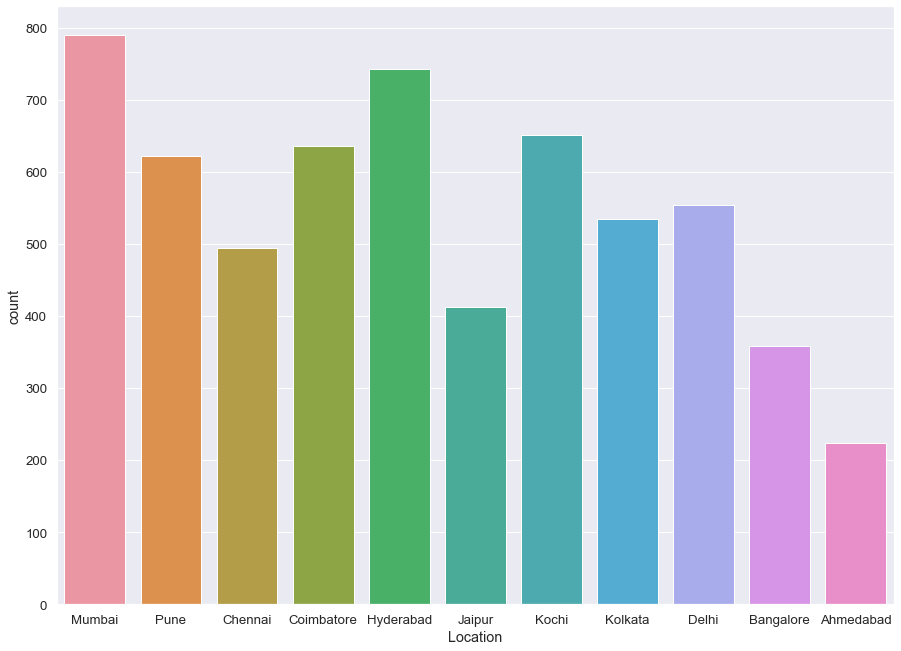

In [10]:
#here we can find that most of the cars found in mumbai and least number of cars in ahmedabad
sns.countplot(data=df_train,x='Location')

<AxesSubplot:xlabel='Location', ylabel='Price'>

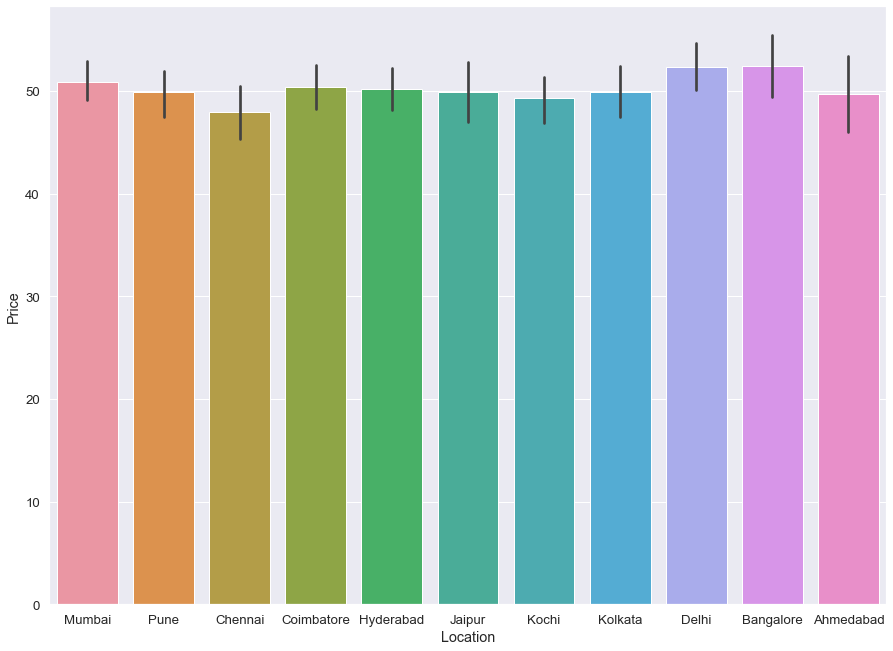

In [11]:
#here we can found that the average price of cars in delhi and banglore is the highest and in chennai is least
sns.barplot(data=df_train,x="Location",y="Price",estimator=np.mean)

<AxesSubplot:xlabel='Location', ylabel='count'>

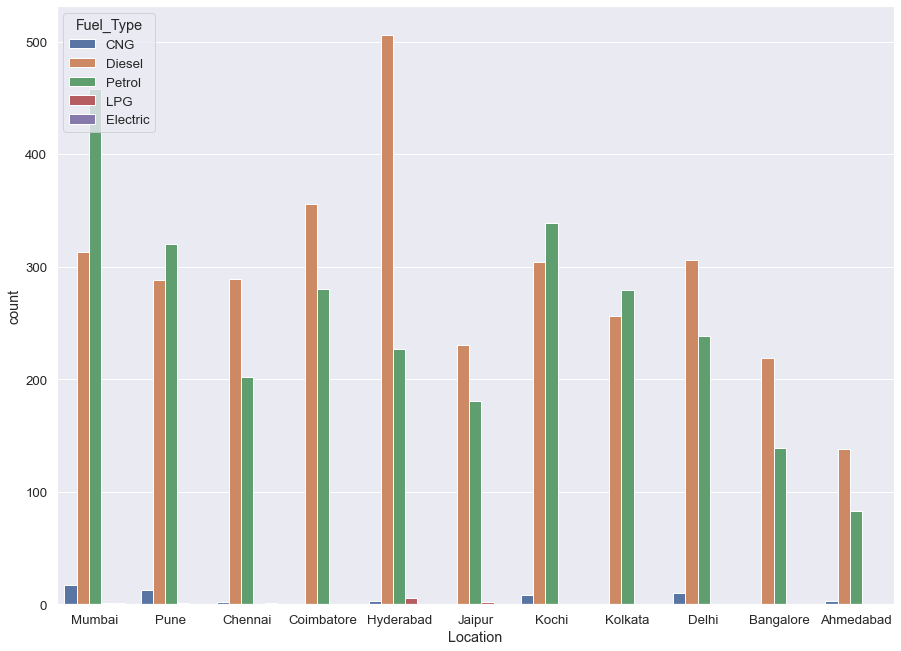

In [12]:
#here we can find most used fuel types in each country is diesel and petrol
sns.countplot(data=df_train,x="Location",hue="Fuel_Type")

In [13]:
#here the relation between KM driven and type of car automatic/manual within each country
pd.pivot_table(data=df_train,columns='Location',index="Transmission",values="Kilometers_Driven")

Location,Ahmedabad,Bangalore,Chennai,Coimbatore,Delhi,Hyderabad,Jaipur,Kochi,Kolkata,Mumbai,Pune
Transmission,,,,,,,,,,,
Automatic,58799.620690,48291.375000,116176.541667,45206.801619,52698.953216,59863.331633,61888.115385,42547.268293,44115.362500,44000.861386,66967.486111
Manual,53982.578313,65286.827103,81566.754011,48174.982005,59378.284595,74590.256410,73049.072022,45902.560538,43478.232967,45935.041068,71635.757322


<AxesSubplot:xlabel='Location', ylabel='count'>

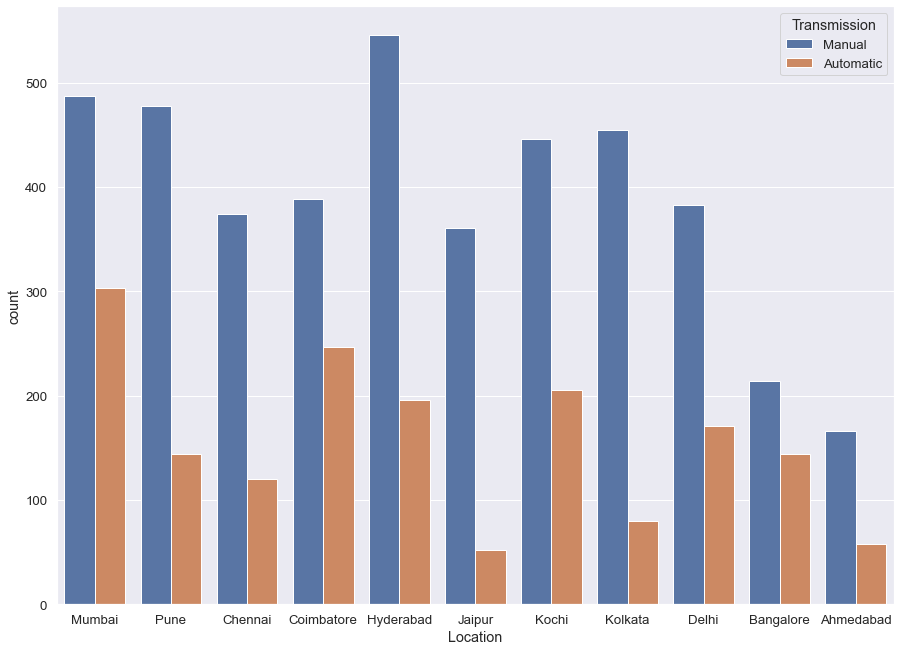

In [14]:
#here manual cars are more popular than automatic ones
sns.countplot(data=df_train,x="Location",hue="Transmission")

### Year

In [15]:
#highest 5 years within this data set
df_train['Year'].value_counts().head(5)

2014    797
2015    744
2016    741
2013    649
2017    587
Name: Year, dtype: int64

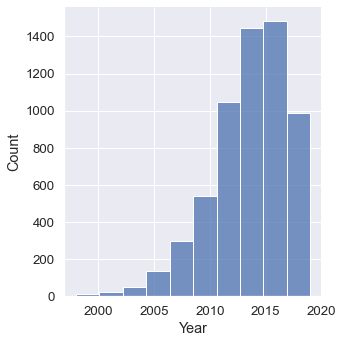

In [16]:
#most cars dist found between 2010-2020
sns.displot(data=df_train,x="Year",bins=10)

<AxesSubplot:xlabel='Year', ylabel='Tax'>

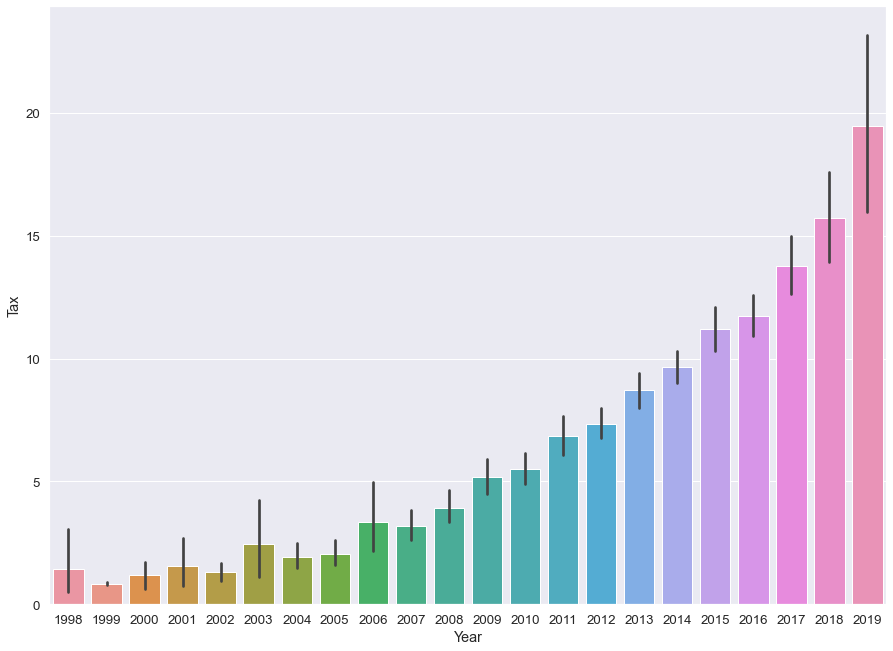

In [17]:
#as year increase taxes increase in 1999 taxes was smallest and in 2019 taxes is highest
sns.barplot(data=df_train,x="Year",y="Tax")

<AxesSubplot:xlabel='Year', ylabel='Price'>

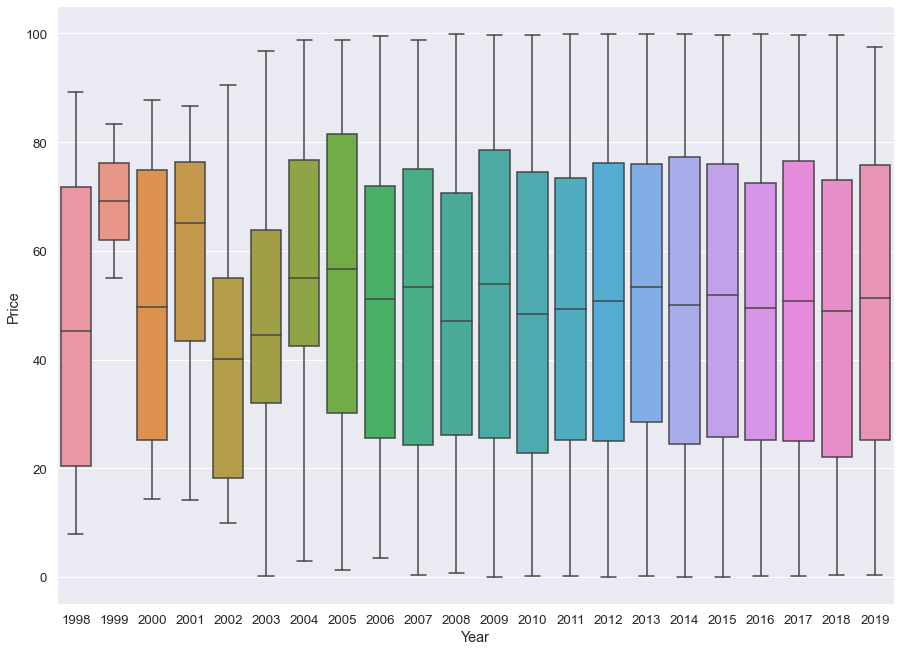

In [18]:
#distribution of car's prices within each year so here 2005 has highest car price and 2002 least car prices
sns.boxplot(data=df_train,x="Year",y="Price")

<AxesSubplot:xlabel='Year', ylabel='Price'>

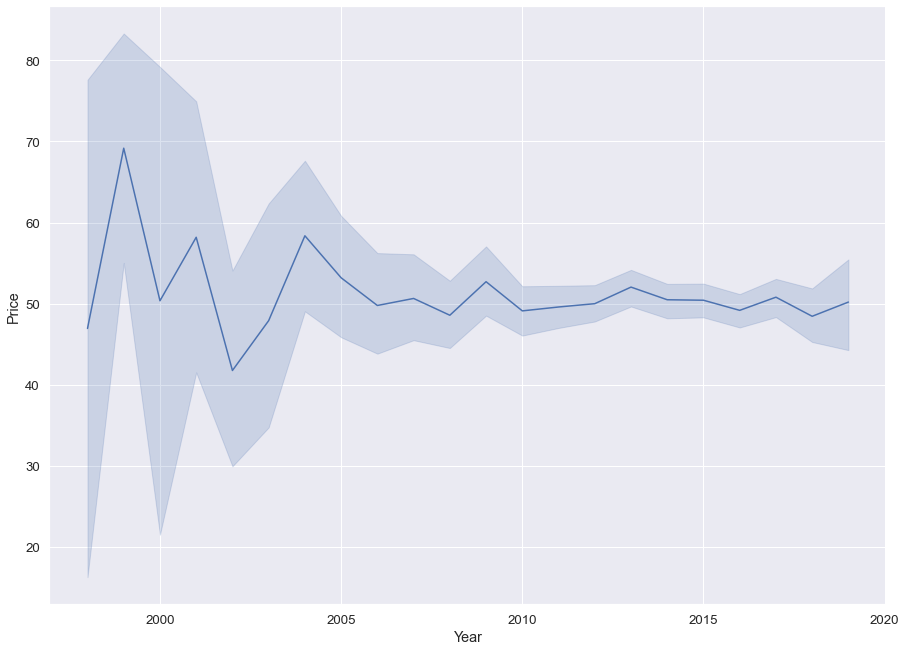

In [19]:
sns.lineplot(data=df_train,x="Year",y="Price")

### Kilometers_Driven

In [20]:
df_train['Kilometers_Driven'].unique()

array([72000, 41000, 46000, ..., 45004, 70602, 27365], dtype=int64)

<AxesSubplot:xlabel='Kilometers_Driven', ylabel='Density'>

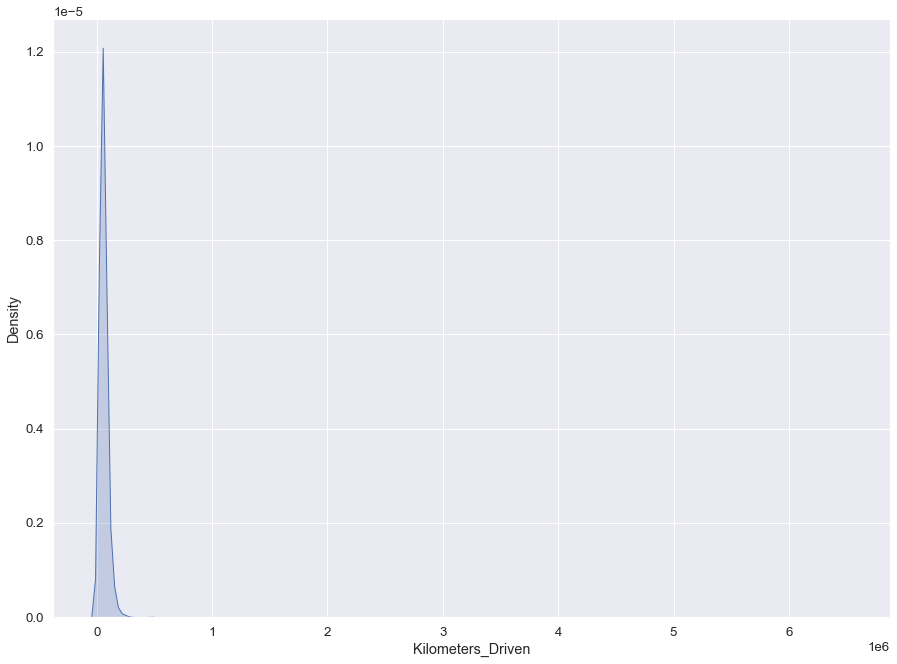

In [22]:
sns.kdeplot(data=df_train,x="Kilometers_Driven",shade=True)

<AxesSubplot:xlabel='Owner_Type', ylabel='Kilometers_Driven'>

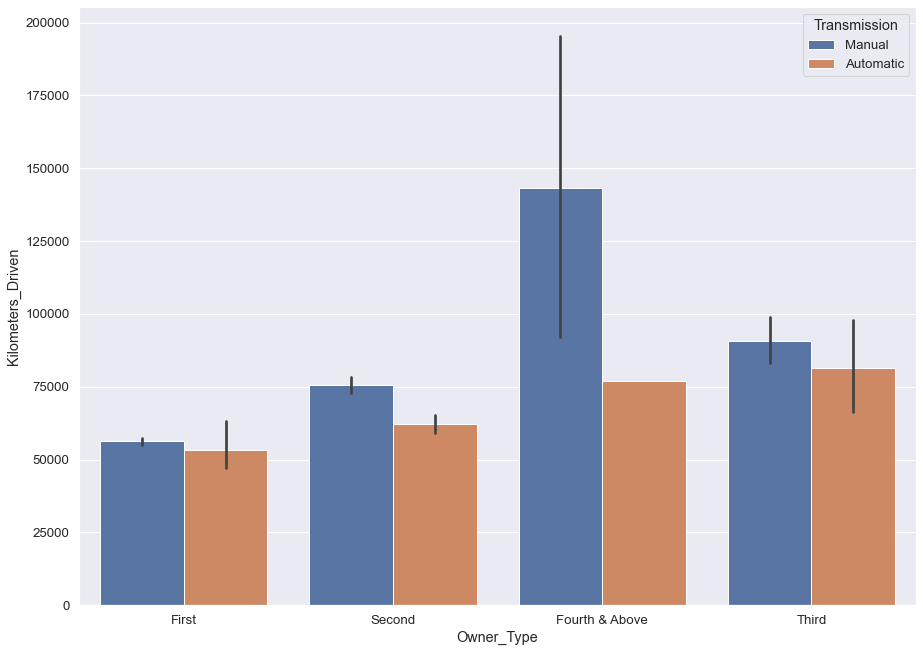

In [23]:
#manual moves km more than automatic and less driven car owner is first one as it still new car on other side fourth and above moves more as it's old car
sns.barplot(data=df_train,y="Kilometers_Driven",x="Owner_Type",hue="Transmission")

<AxesSubplot:xlabel='Year', ylabel='Kilometers_Driven'>

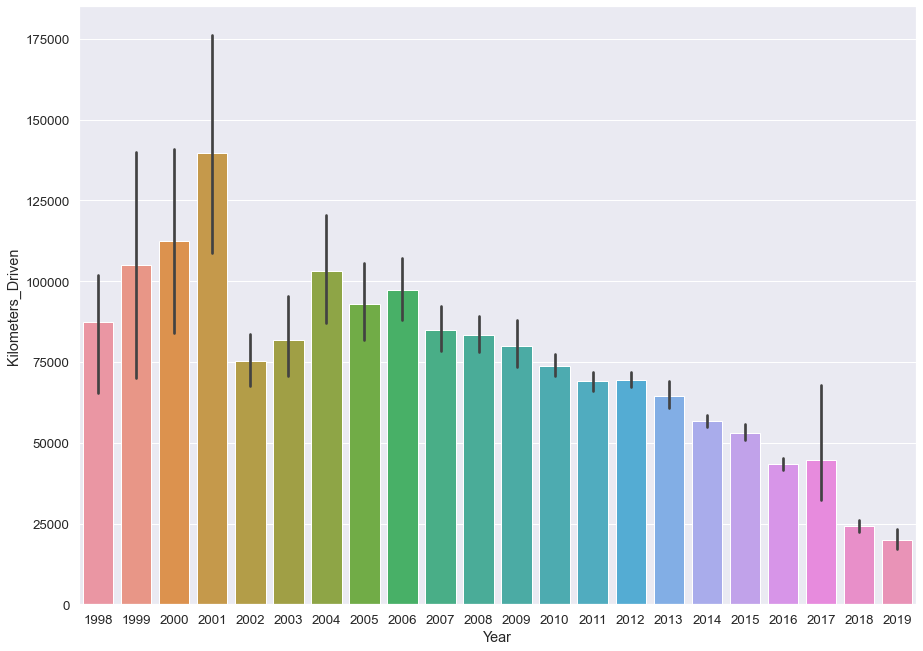

In [24]:
#most kilometers year is 2001
sns.barplot(data=df_train,x="Year",y="Kilometers_Driven")

### Fuel

<AxesSubplot:xlabel='Fuel_Type', ylabel='count'>

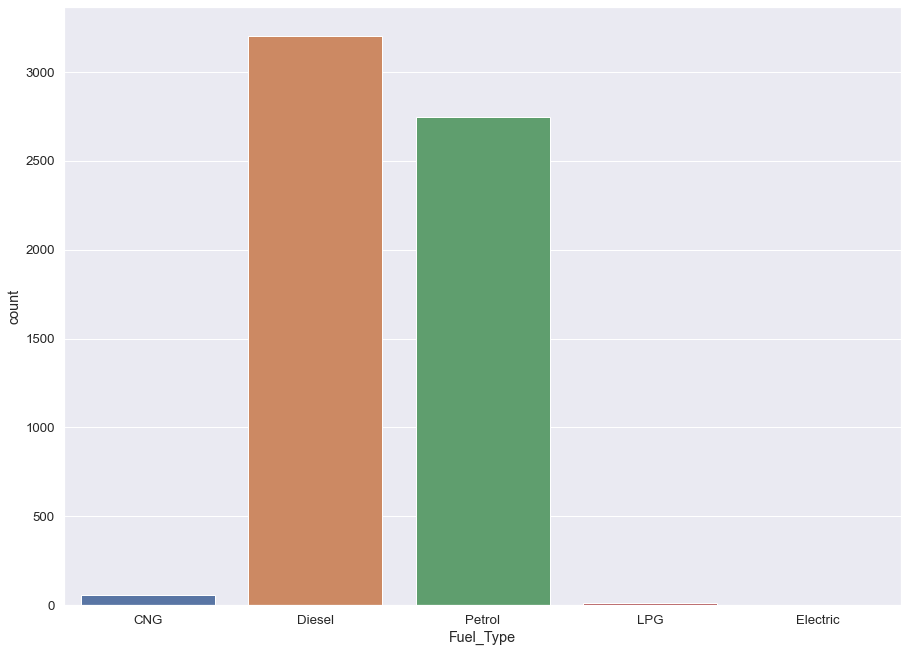

In [25]:
#most fueltype used is diesel and petrol
sns.countplot(data=df_train,x="Fuel_Type")

<AxesSubplot:xlabel='Fuel_Type', ylabel='Power'>

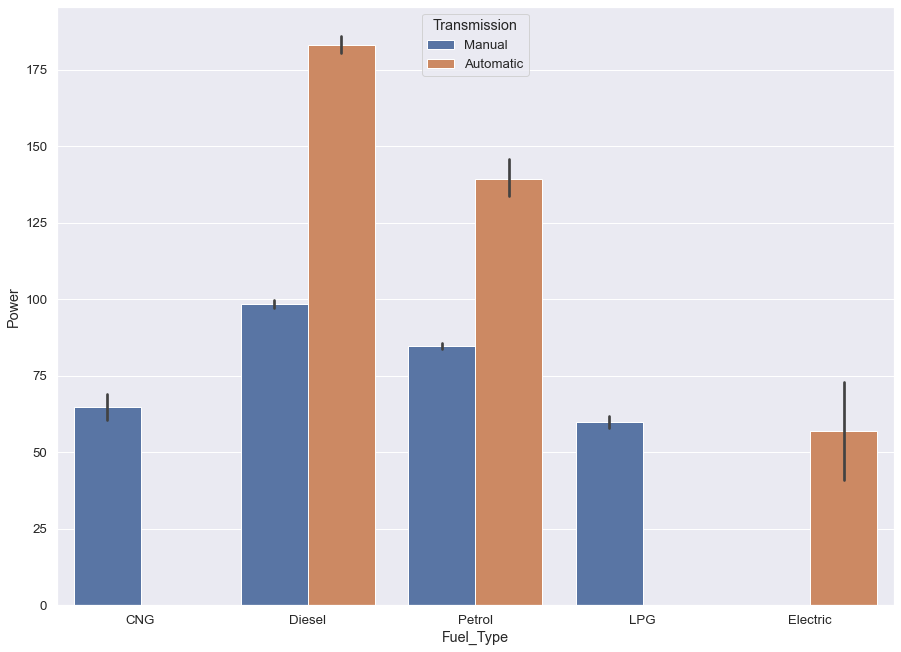

In [26]:
#engine's power is more in diesel also no automatic cars use CNG / LPG and all electric are automatic
sns.barplot(data=df_train,x="Fuel_Type",y="Power",hue="Transmission")

<AxesSubplot:xlabel='Fuel_Type', ylabel='Price'>

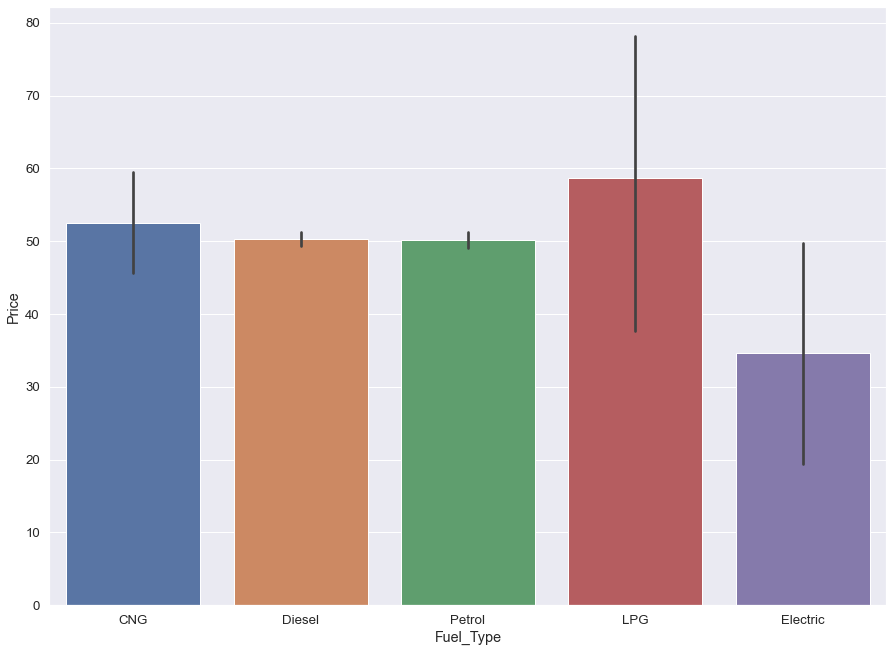

In [27]:
#we can find that the car that used LPG fuel are more expensive
sns.barplot(data=df_train,x="Fuel_Type",y="Price")

### Transimission


In [28]:
df_train['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

<AxesSubplot:xlabel='Transmission', ylabel='Engine'>

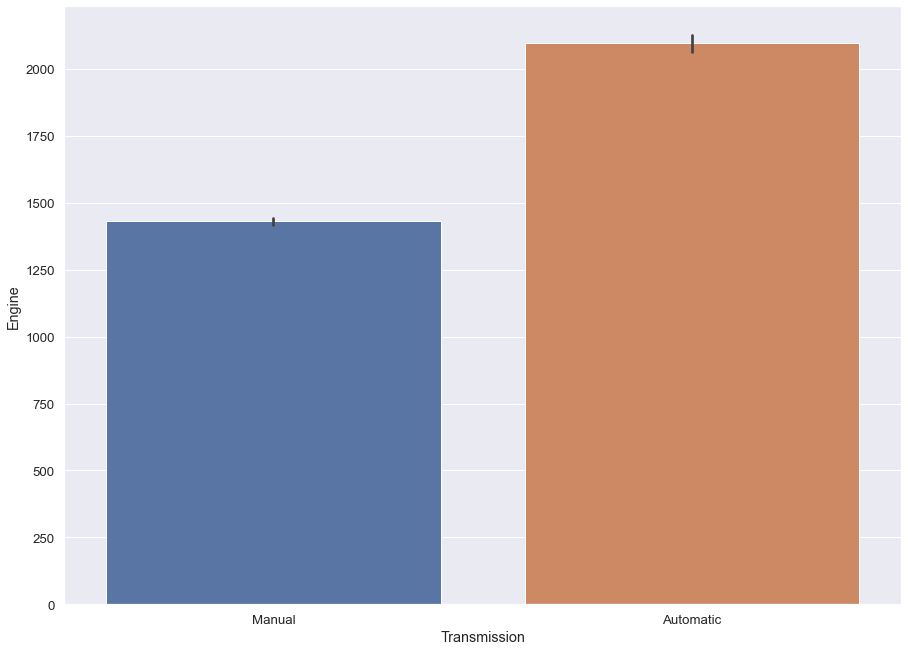

In [29]:
#engine power is highesr in automatic cars
sns.barplot(data=df_train,y="Engine",x="Transmission")

<AxesSubplot:xlabel='Transmission', ylabel='Price'>

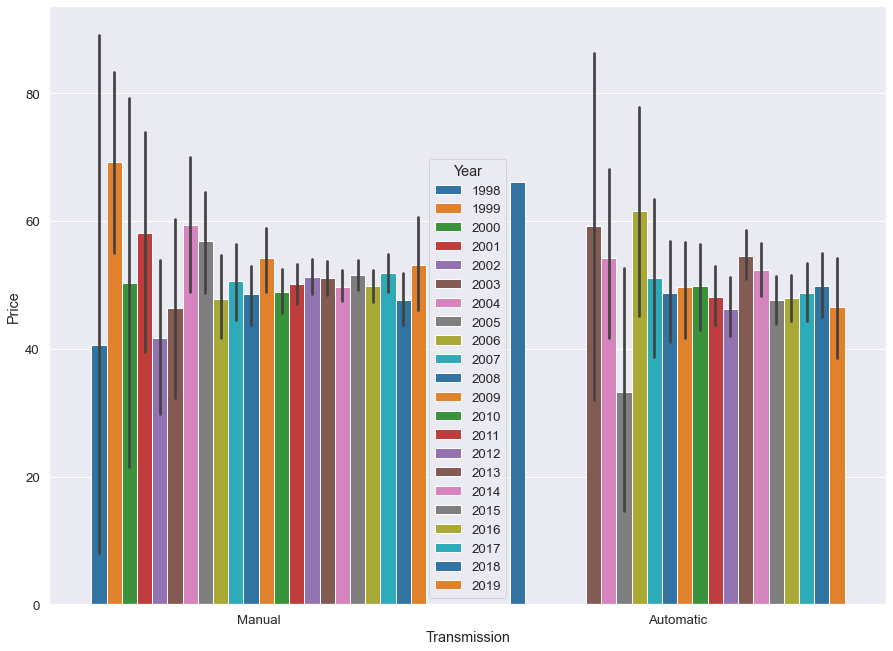

In [30]:
#manual cars is more expensive than automatic
sns.barplot(data=df_train,y="Price",x="Transmission",hue="Year",palette="tab10")

### Owner_Type

In [31]:
df_train['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

<AxesSubplot:xlabel='Owner_Type', ylabel='count'>

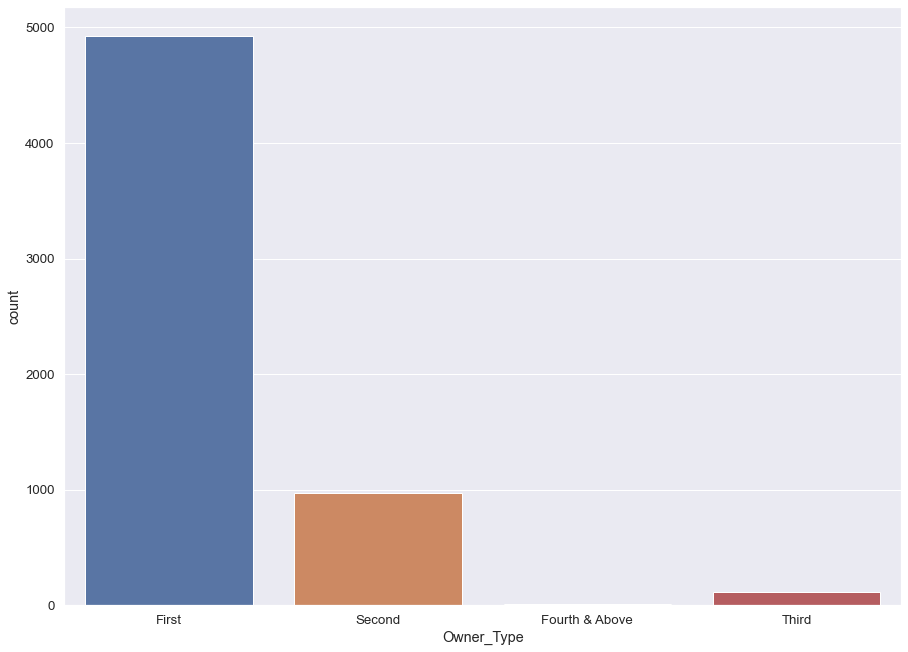

In [32]:
#most cars are first use
sns.countplot(data=df_train,x="Owner_Type")

<AxesSubplot:xlabel='Owner_Type', ylabel='Price'>

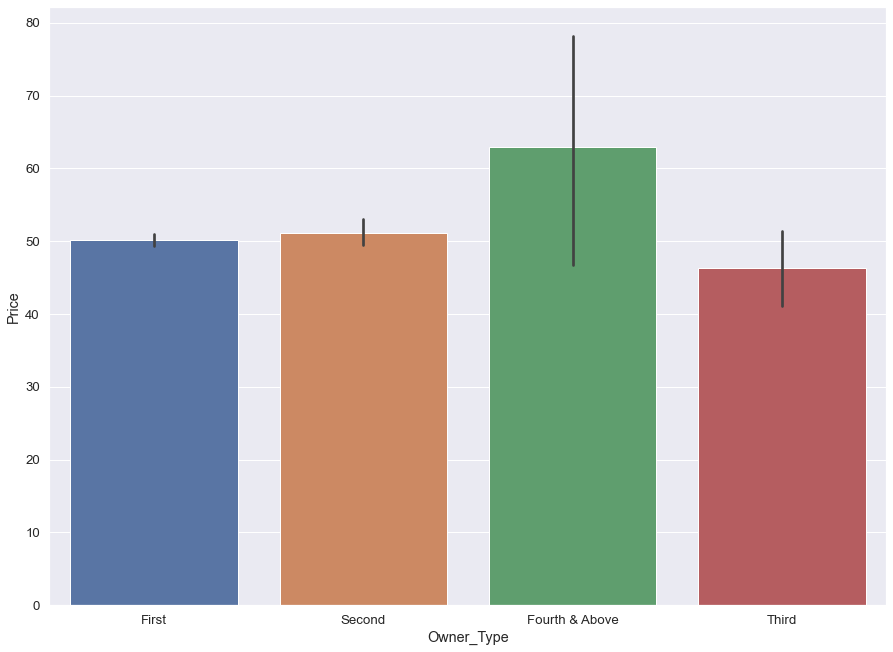

In [33]:
#average price of fourth and above car is high
sns.barplot(data=df_train,x="Owner_Type",y="Price",estimator=np.mean)

### seats

In [34]:
df_train['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [35]:
df_train[df_train['Seats']==0.0]= np.nan

<AxesSubplot:xlabel='Seats', ylabel='Price'>

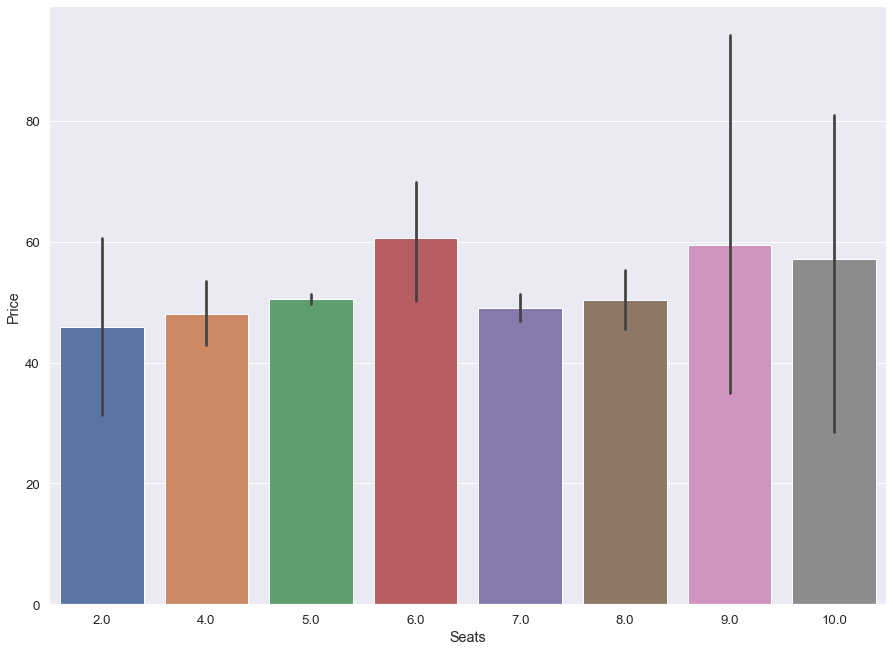

In [36]:
sns.barplot(data=df_train,x="Seats",y="Price")

# Corr

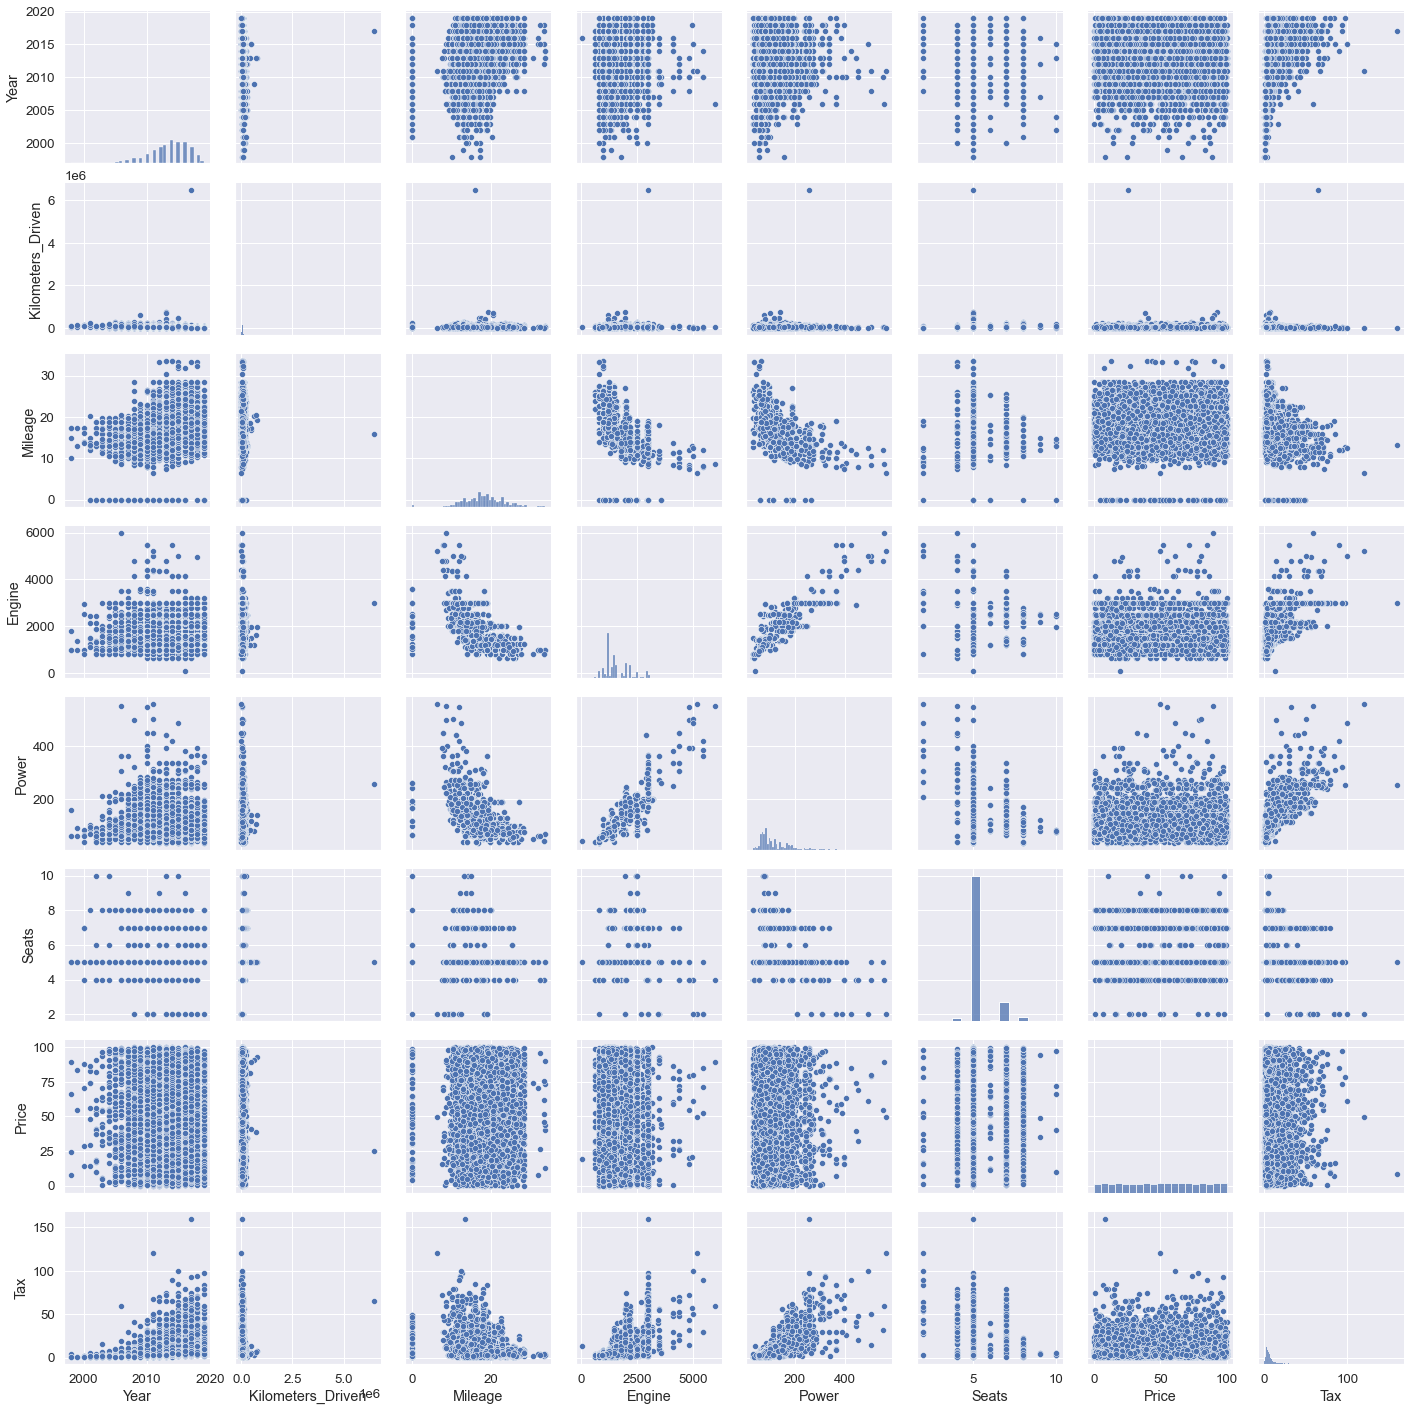

In [37]:
sns.pairplot(data=df_train)

<AxesSubplot:>

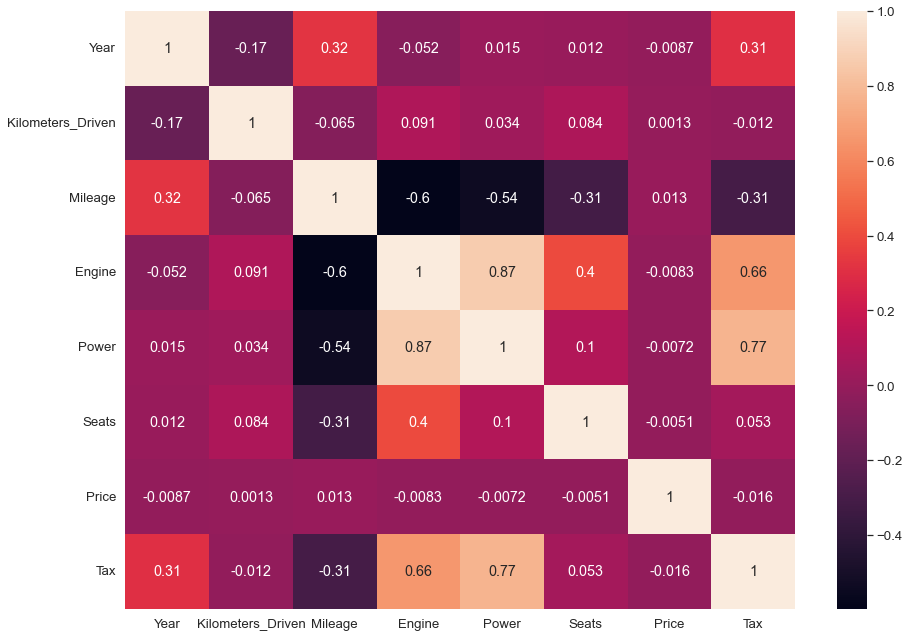

In [38]:
#we have strong correlation between (engine/power) and(tax/power)
sns.heatmap(df_train.corr(),annot=True)

# Questions

In [39]:
#What is the 5 top expenisve cars that has seats of 5
df_train[df_train['Seats']==5].sort_values(by='Price',ascending=False).head(5)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Tax
2092,Ford Figo Diesel ZXI,Hyderabad,2013.0,71336.0,Diesel,Manual,First,20.00,1399.0,68.0,5.0,99.99,4.10
3844,Hyundai i20 1.2 Sportz,Kolkata,2016.0,19008.0,Petrol,Manual,First,17.00,1197.0,80.0,5.0,99.93,5.25
2316,Volkswagen Jetta 2012-2014 2.0L TDI Comfortline,Kolkata,2012.0,67000.0,Diesel,Manual,First,19.33,1968.0,138.1,5.0,99.92,5.00
4839,Nissan Micra XV Primo,Kolkata,2011.0,43000.0,Petrol,Manual,First,18.06,1198.0,75.0,5.0,99.91,2.13
4148,Ford Ikon 1.3 Flair,Coimbatore,2008.0,59833.0,Petrol,Manual,Fourth & Above,13.80,1299.0,70.0,5.0,99.90,1.97


In [40]:
#What is the average kilometers driven of the free manual & automatic apps
df_train.groupby('Transmission').mean()['Kilometers_Driven']

Transmission
Automatic    54995.063991
Manual       60219.771110
Name: Kilometers_Driven, dtype: float64

In [41]:
#What is the average price of the carss for each transimission with each seats numbers
x = pd.pivot_table(index='Transmission', columns='Seats', values='Price', data=df_train, aggfunc=np.mean)
x

Seats,2.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
Transmission,,,,,,,,
Automatic,46.704,45.777581,50.097412,60.302500,46.583085,32.771667,NaN,NaN
Manual,33.170,51.805405,50.609869,60.706296,50.054186,51.110078,59.48,57.198


In [42]:
#How many car have power > 500 and what is thier avg price
df_train[df_train['Power']> 500]['Price'].mean()

68.59

In [43]:
#What is the max and min cars price for owner_type
df_train.groupby('Owner_Type').describe()['Price']

,count,mean,std,min,25%,50%,75%,max
Owner_Type,,,,,,,,
First,4928.0,50.172827,28.861335,0.00,25.3375,50.465,75.355,99.99
Fourth & Above,9.0,62.993333,25.980802,18.94,46.3700,72.930,82.160,99.90
Second,968.0,51.150207,29.074726,0.07,25.4075,51.710,76.355,99.85
Third,113.0,46.346549,28.309166,0.27,19.8100,48.110,69.080,96.43


In [44]:
#is there a correlation between Engine, power, Kilometers_Driven with the price of the car?
df_train.corr()['Price']

Year                -0.008664
Kilometers_Driven    0.001260
Mileage              0.013287
Engine              -0.008318
Power               -0.007212
Seats               -0.005056
Price                1.000000
Tax                 -0.016199
Name: Price, dtype: float64

In [45]:
#What is the average car price kilometers less than 40000 driven and transimission is automatic and Fuel_Type is diesel?
df_train[(df_train['Power']< 40000) & (df_train['Transmission']=="Automatic")&(df_train['Fuel_Type']=="Diesel")]['Price'].mean()

49.36299363057325

# feature engineering

In [46]:
df_train["cars_old"]=2022-df_train["Year"]

In [47]:
#to convert kilometers to miles, simply multiply the number of kilometers by 0.62137.
df_train["miles_driven"]=0.6*df_train["Kilometers_Driven"]

In [48]:
df_train.drop(axis=1,columns=["Kilometers_Driven","Year",'Name'],inplace= True)

# preprocessing

### MISSING VALUES

In [49]:
df_train.shape

(6019, 12)

In [50]:
df_train.isnull().mean()*100

Location        0.016614
Fuel_Type       0.016614
Transmission    0.016614
Owner_Type      0.016614
Mileage         0.049842
Engine          0.614720
Power           2.375810
Seats           0.714404
Price           0.016614
Tax             0.016614
cars_old        0.016614
miles_driven    0.016614
dtype: float64

<AxesSubplot:xlabel='Power'>

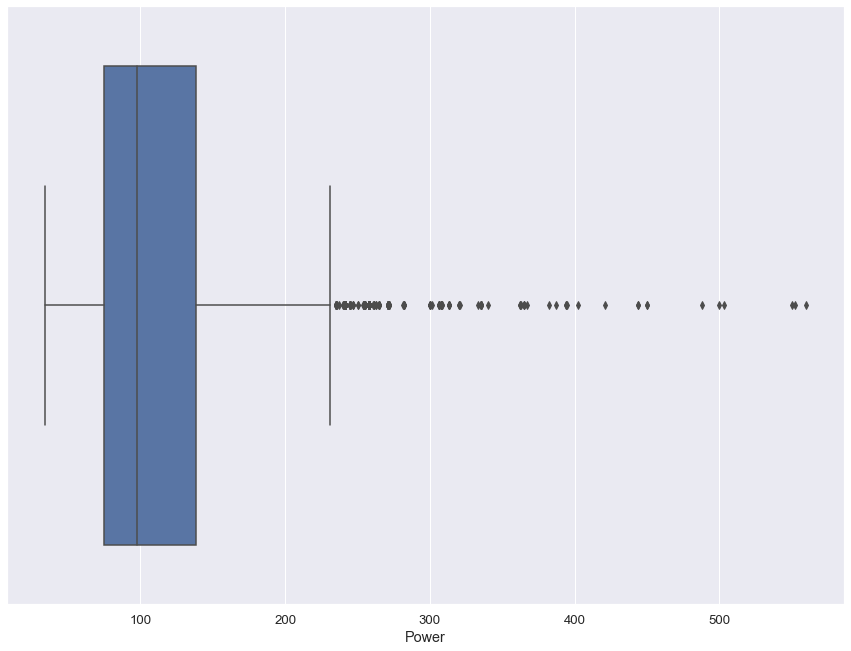

In [51]:
sns.boxplot(data=df_train,x="Power")

In [52]:
df_train['Power'].fillna(df_train['Power'].median(), inplace=True)

In [53]:
df_train.dropna(axis=0,inplace =True)

In [54]:
df_train.shape

(5974, 12)

### outliers

In [55]:
df_train.head()

,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Tax,cars_old,miles_driven
0,Mumbai,CNG,Manual,First,26.60,998.0,58.16,5.0,98.14,1.75,12.0,43200.0
1,Pune,Diesel,Manual,First,19.67,1582.0,126.20,5.0,70.73,12.50,7.0,24600.0
2,Chennai,Petrol,Manual,First,18.20,1199.0,88.70,5.0,0.95,4.50,11.0,27600.0
3,Chennai,Diesel,Manual,First,20.77,1248.0,88.76,7.0,78.04,6.00,10.0,52200.0
4,Coimbatore,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,77.82,17.74,9.0,24402.0


<AxesSubplot:xlabel='miles_driven'>

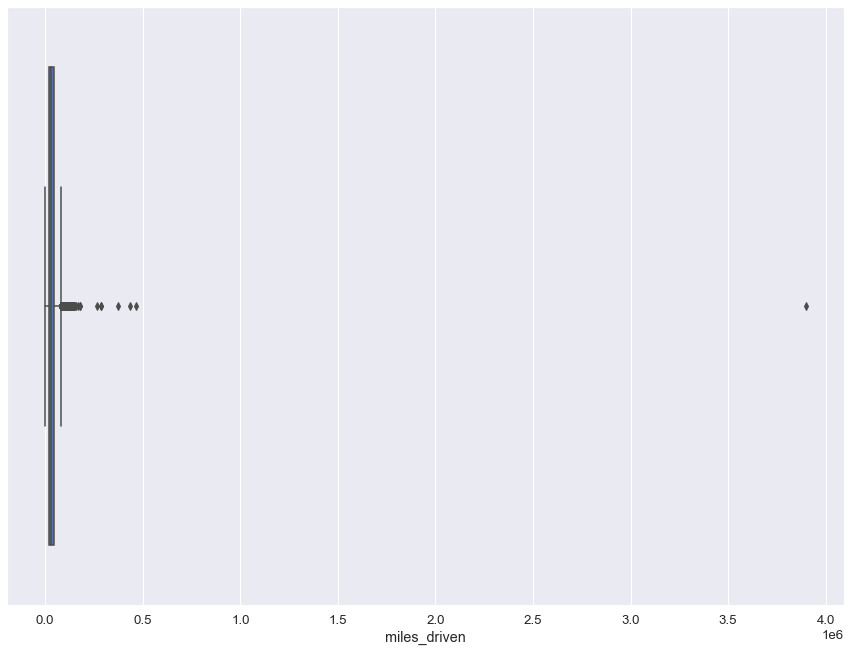

In [56]:
sns.boxplot(data=df_train,x="miles_driven")

<AxesSubplot:xlabel='Mileage'>

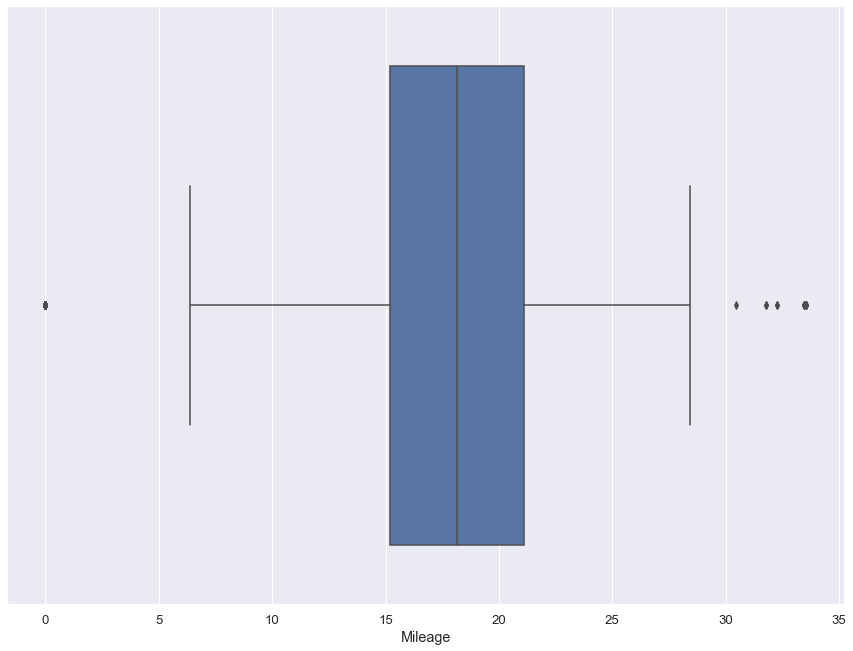

In [57]:
sns.boxplot(data=df_train,x="Mileage")

<AxesSubplot:xlabel='Engine'>

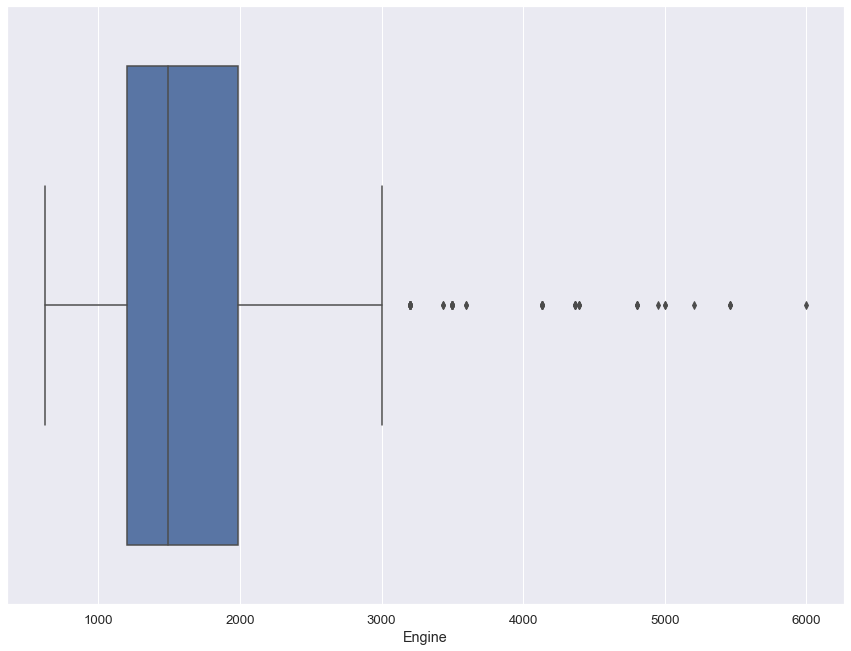

In [58]:
sns.boxplot(data=df_train,x="Engine")

<AxesSubplot:xlabel='Tax'>

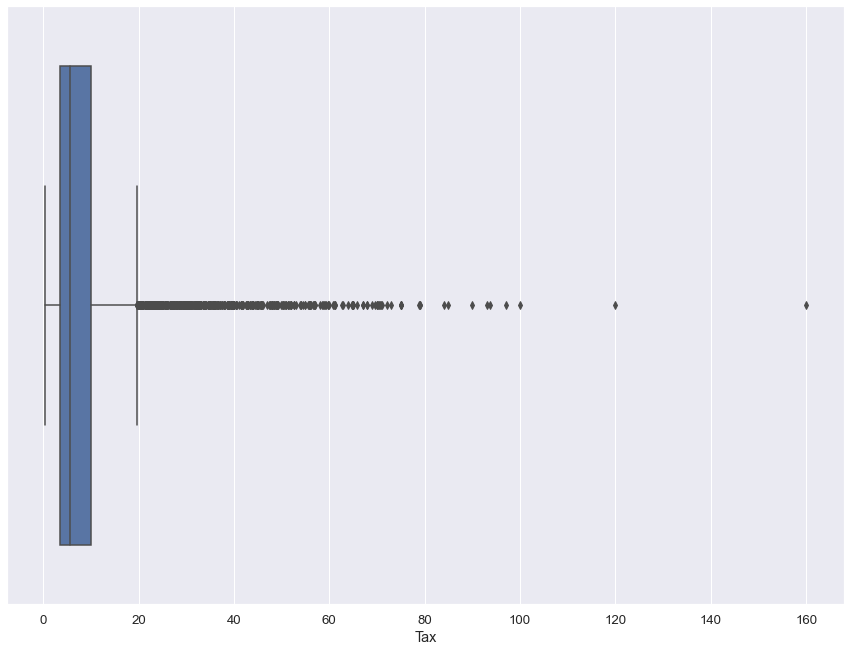

In [59]:
sns.boxplot(data=df_train,x="Tax")

In [60]:
!pip install datasist
import datasist as ds
from datasist.structdata import detect_outliers

You should consider upgrading via the 'E:\Programming\IDLE\python.exe -m pip install --upgrade pip' command.


In [61]:
outlier= detect_outliers(df_train,0,[ 'Tax', 'Engine',"Mileage","miles_driven"])
len(outlier)
df_train.drop(outlier,inplace=True)

### categorical data

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4997 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Location      4997 non-null   object 
 1   Fuel_Type     4997 non-null   object 
 2   Transmission  4997 non-null   object 
 3   Owner_Type    4997 non-null   object 
 4   Mileage       4997 non-null   float64
 5   Engine        4997 non-null   float64
 6   Power         4997 non-null   float64
 7   Seats         4997 non-null   float64
 8   Price         4997 non-null   float64
 9   Tax           4997 non-null   float64
 10  cars_old      4997 non-null   float64
 11  miles_driven  4997 non-null   float64
dtypes: float64(8), object(4)
memory usage: 507.5+ KB


In [63]:
df_train['Location'].value_counts()

Mumbai        680
Hyderabad     590
Kochi         539
Pune          525
Kolkata       499
Coimbatore    474
Delhi         471
Chennai       394
Jaipur        365
Bangalore     256
Ahmedabad     204
Name: Location, dtype: int64

In [64]:
df_train['Fuel_Type'].value_counts()

Petrol    2558
Diesel    2387
CNG         42
LPG         10
Name: Fuel_Type, dtype: int64

In [65]:
df_train['Transmission'].value_counts()

Manual       4011
Automatic     986
Name: Transmission, dtype: int64

In [66]:
df_train['Seats'].value_counts()

5.0     4336
7.0      479
8.0      106
4.0       46
6.0       24
10.0       4
9.0        2
Name: Seats, dtype: int64

In [67]:
df_train = pd.get_dummies(df_train, columns=['Owner_Type','Location', 'Fuel_Type', 'Transmission', 'Seats'], drop_first=True)

In [68]:
"""size_dict = {'First':1, 
        'Second':2, 
        'Third':3, 
        'Fourth & Above':4}

# apply using map
df_train['Owner_Type'] = df_train['Owner_Type'].map(size_dict)"""

"size_dict = {'First':1, \n        'Second':2, \n        'Third':3, \n        'Fourth & Above':4}\n\n# apply using map\ndf_train['Owner_Type'] = df_train['Owner_Type'].map(size_dict)"

In [69]:
df_train.head()

,Mileage,Engine,Power,Price,Tax,cars_old,miles_driven,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,...,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,26.60,998.0,58.16,98.14,1.75,12.0,43200.0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,19.67,1582.0,126.20,70.73,12.50,7.0,24600.0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
2,18.20,1199.0,88.70,0.95,4.50,11.0,27600.0,0,0,0,...,0,0,1,1,1,0,0,0,0,0
3,20.77,1248.0,88.76,78.04,6.00,10.0,52200.0,0,0,0,...,1,0,0,1,0,0,1,0,0,0
4,15.20,1968.0,140.80,77.82,17.74,9.0,24402.0,0,1,0,...,1,0,0,0,1,0,0,0,0,0


### split data

In [70]:
x = df_train.drop('Price', axis=1)
y = df_train['Price']

In [71]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=123)

### scaling

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

# dimension Reduction

In [96]:
"""pca=PCA(n_components=60)
pcs=pca.fit_transform(x)
pcs"""

'pca=PCA(n_components=60)\npcs=pca.fit_transform(x)\npcs'

In [97]:
x.columns

Index(['Mileage', 'Engine', 'Power', 'Tax', 'cars_old', 'miles_driven',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third',
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual', 'Seats_5.0', 'Seats_6.0',
       'Seats_7.0', 'Seats_8.0', 'Seats_9.0', 'Seats_10.0'],
      dtype='object')

In [122]:
#note:ignore drop first
data=[26.60+998.0+58.16+1.75+12.0+43200.0]+[1,0,0,0]+[0,0,0,0,0,1,0,0,0,0,0]+[0,0,1,0]+[0,0]+[0,1,0,0,0,0,0]
data= scaler.transform([data])
pred=model.predict(data)
pred

array([47.61592], dtype=float32)

# MODELS

In [100]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

In [101]:
models={
    'LR':LinearRegression(),
    'KNN':KNeighborsRegressor(),
    'SVR':SVR(),
    'DT':DecisionTreeRegressor(),
    'RF':RandomForestRegressor(),
    'XGBR':XGBRegressor()
}

Mean absolute error: This is the average of absolute errors of all the data points in the given dataset.
Mean squared error: This is the average of the squares of the errors of all the data points in the given dataset. It is one of the most popular metrics out there!

Median absolute error: This is the median of all the errors in the given dataset. The main advantage of this metric is that it's robust to outliers. A single bad point in the test dataset wouldn't skew the entire error metric, as opposed to a mean error metric.

Explained variance score: This score measures how well our model can account for the variation in our dataset. A score of 1.0 indicates that our model is perfect.

R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination. This tells us how well the unknown samples will be predicted by our model. The best possible score is 1.0, but the score can be negative as well.

In [102]:
import sklearn.metrics as sm
for name,model in models.items():
    print(f'using:{name}')
    model.fit(x_train,y_train)
    y_test_pred=model.predict(x_test)
    print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_test_pred), 2)) 
    print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
    print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
    print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
    print("R2 score =", round(sm.r2_score(y_test, y_test_pred), 2))
    print('_'*30)

using:LR
Mean absolute error = 24.6
Mean squared error = 823.1
Median absolute error = 24.24
Explain variance score = -0.02
R2 score = -0.02
______________________________
using:KNN
Mean absolute error = 25.98
Mean squared error = 955.95
Median absolute error = 23.97
Explain variance score = -0.18
R2 score = -0.18
______________________________
using:SVR
Mean absolute error = 24.53
Mean squared error = 822.98
Median absolute error = 23.64
Explain variance score = -0.01
R2 score = -0.02
______________________________
using:DT
Mean absolute error = 33.53
Mean squared error = 1702.17
Median absolute error = 28.84
Explain variance score = -1.1
R2 score = -1.1
______________________________
using:RF
Mean absolute error = 25.5
Mean squared error = 905.83
Median absolute error = 24.08
Explain variance score = -0.12
R2 score = -0.12
______________________________
using:XGBR
Mean absolute error = 26.16
Mean squared error = 974.35
Median absolute error = 24.37
Explain variance score = -0.2
R2 sc

In [ ]:
############################################

In [103]:
LR=LinearRegression()

In [104]:
from sklearn.model_selection import cross_validate,cross_val_predict,cross_val_score
LR_cv=cross_validate(LR,x,y,cv=10,n_jobs=-1,scoring='accuracy',return_train_score=True)

In [105]:
LR_cv

{'fit_time': array([0.14732647, 0.14333677, 0.14233971, 0.14134264, 0.02462316,
        0.01764059, 0.01899791, 0.0179503 , 0.01396322, 0.01595926]),
 'score_time': array([0.07962894, 0.08262563, 0.0856123 , 0.05385852, 0.01398253,
        0.01298475, 0.00997448, 0.00399065, 0.00696802, 0.00398707]),
 'test_score': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]),
 'train_score': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])}

In [110]:
print(LR_cv['fit_time'].mean())
print(LR_cv['score_time'].mean())

0.06834800243377685
0.035361289978027344


In [111]:
LR.fit(x_train,y_train)

LinearRegression()

In [112]:
LR.score(x_test,y_test)

-0.017672632621860362

In [108]:
data=[26.60+998.0+58.16+1.75+12.0+43200.0]+[1,0,0,0]+[0,0,0,0,0,1,0,0,0,0,0]+[0,0,1,0]+[0,0]+[0,1,0,0,0,0,0]
data= scaler.transform([data])
pred=model.predict(data)
pred

array([47.61592], dtype=float32)

In [113]:
"""g_s.fit(x,y)
g_s.best_params_
g_s.best_score_"""

'g_s.fit(x,y)\ng_s.best_params_\ng_s.best_score_'

In [123]:
model=joblib.load('model.h5')
model.fit(x_train,y_train)
y_test_pred=model.predict(x_test)

# Hyperparameters Tuning

In [81]:
!pip install SVR

You should consider upgrading via the 'E:\Programming\IDLE\python.exe -m pip install --upgrade pip' command.


In [82]:
from sklearn.svm import SVR
SVR=SVR()
{'C':[1,100], 'kernel':['linear', 'sigmoid', 'poly']},
params = [
        {'C':[1, 10], 'kernel':['linear', 'sigmoid'], 'gamma':[ 0.7, 0.1]}
         ]
from sklearn.model_selection import RandomizedSearchCV
g_s=RandomizedSearchCV(estimator=SVR,param_distributions=params,scoring='neg_mean_squared_error',cv=5,n_jobs=-1)

In [83]:
"""g_s.fit(x,y)
g_s.best_params_
g_s.best_score_"""

'g_s.fit(x,y)\ng_s.best_params_\ng_s.best_score_'

# save model

In [119]:
#svr as the data is small and has a linear and non linear relation as found in pairplot
#model=SVR(kernel='sigmoid', gamma='scale',C=1.0)
model=model.fit(x_train,y_train)
y_test_pred=model.predict(x_test)

In [120]:
import joblib

joblib.dump(model,'model.h5')
joblib.dump(scaler,'scaler.h5')
#joblib.dump(x.columns,'features.h5')

['scaler.h5']